In [1]:
from __future__ import division
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 16.0)
import cv2
import time

from mpl_toolkits.mplot3d import Axes3D
import cPickle
import numpy as np

import scipy.io as sio
from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures

from CameraNetwork.calibration import raw2RGB, RGB2raw

import fisheye
from CameraNetwork import Normalization, FisheyeProxy
from CameraNetwork.calibration import VignettingCalibration
import CameraNetwork.global_settings as gs

i:\amit\office backup\amit\studies\cameranetwork\CameraNetwork\transformation_matrices.py:1899: UserWarning: failed to import module _transformations
  warnings.warn("failed to import module %s" % name)


## Calibration using the (color) separate findSpot (new version).

In [2]:
with open("test_measurements.pkl", "rb") as f:
    color_measurements = cPickle.load(f)

In [3]:
vc = VignettingCalibration(polynomial_degree=2)
vc.calibrate(color_measurements)
ratios = raw2RGB(vc.ratio)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


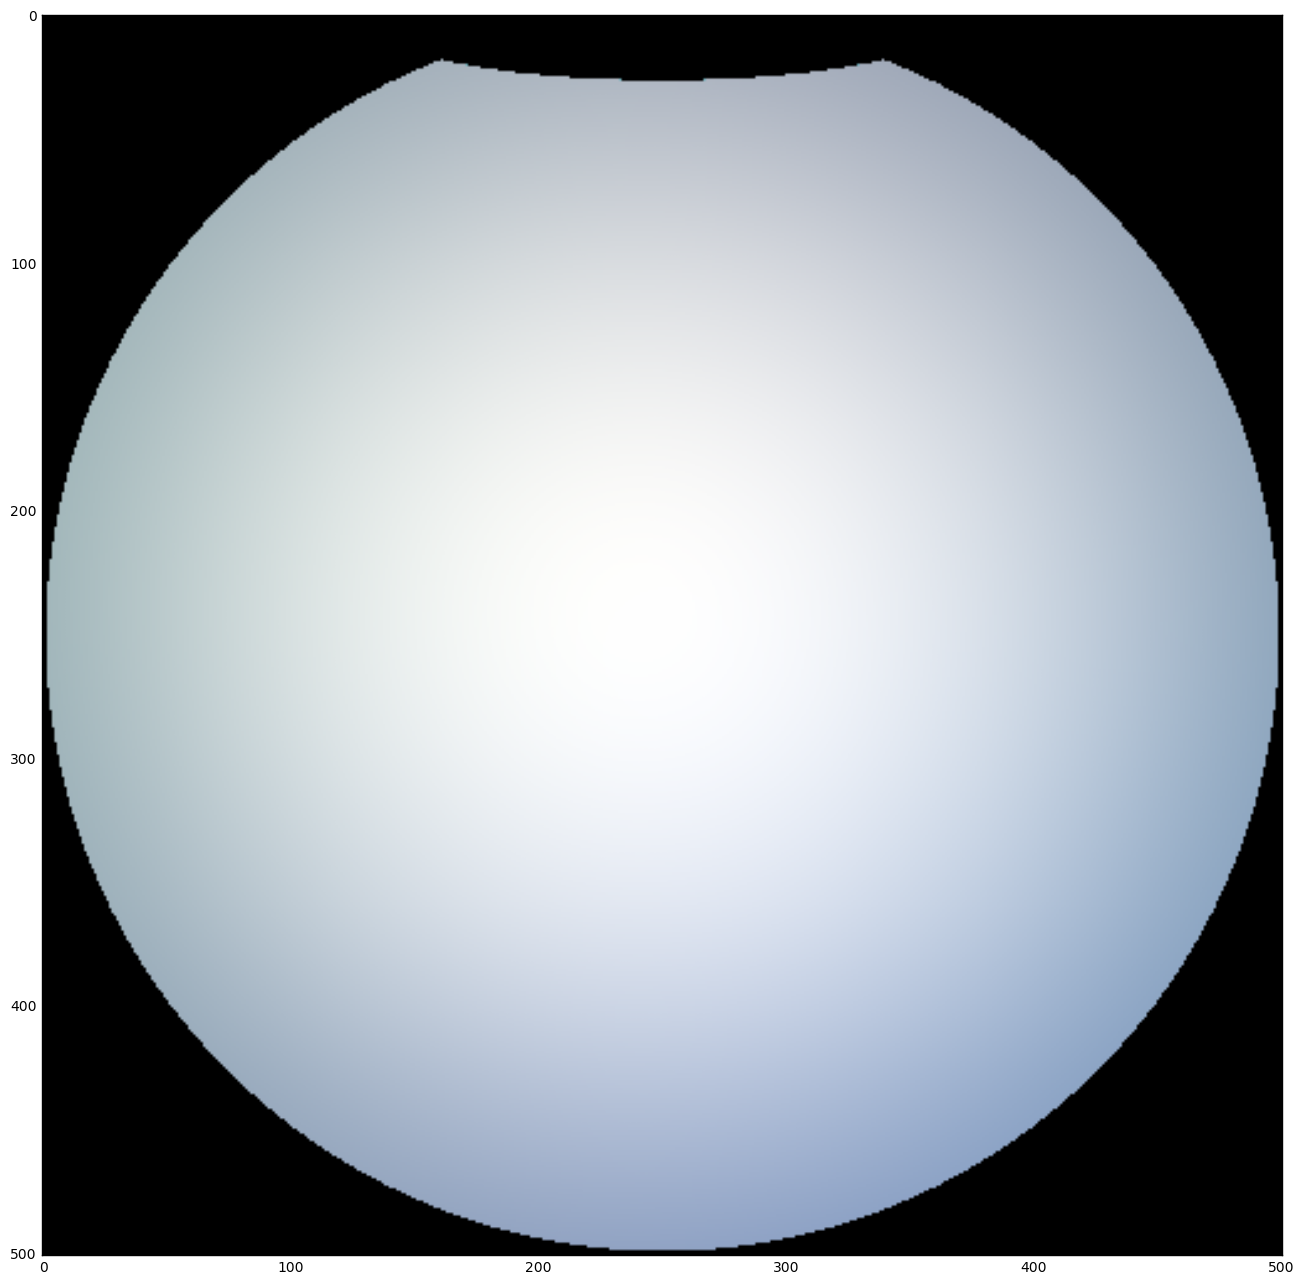

In [4]:
fe = fisheye.load_model(
    "../data/fisheye.pkl", calib_img_shape=(600, 800))

#
# Creating the normalization object.
#
normalization = Normalization(
    gs.DEFAULT_NORMALIZATION_SIZE, FisheyeProxy(fe)
)

d = normalization.normalize(np.dstack(ratios))
plt.imshow(d)

## Calibration using the (color) joint findSpot (old version).

In [2]:
vc = VignettingCalibration.readMeasurements(r"I:\amit\Office backup\amit\studies\cameranetwork\scripts_calibrate\radiometric_calibration\4102820392")
ratios = raw2RGB(vc.ratio)

In [15]:
fe = fisheye.load_model(
    r"I:\amit\Office backup\amit\studies\cameranetwork\scripts_calibrate\radiometric_calibration\4102820392\fisheye.pkl", calib_img_shape=(600, 800))

#
# Creating the normalization object.
#
normalization = Normalization(
    gs.DEFAULT_NORMALIZATION_SIZE, FisheyeProxy(fe)
)



[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


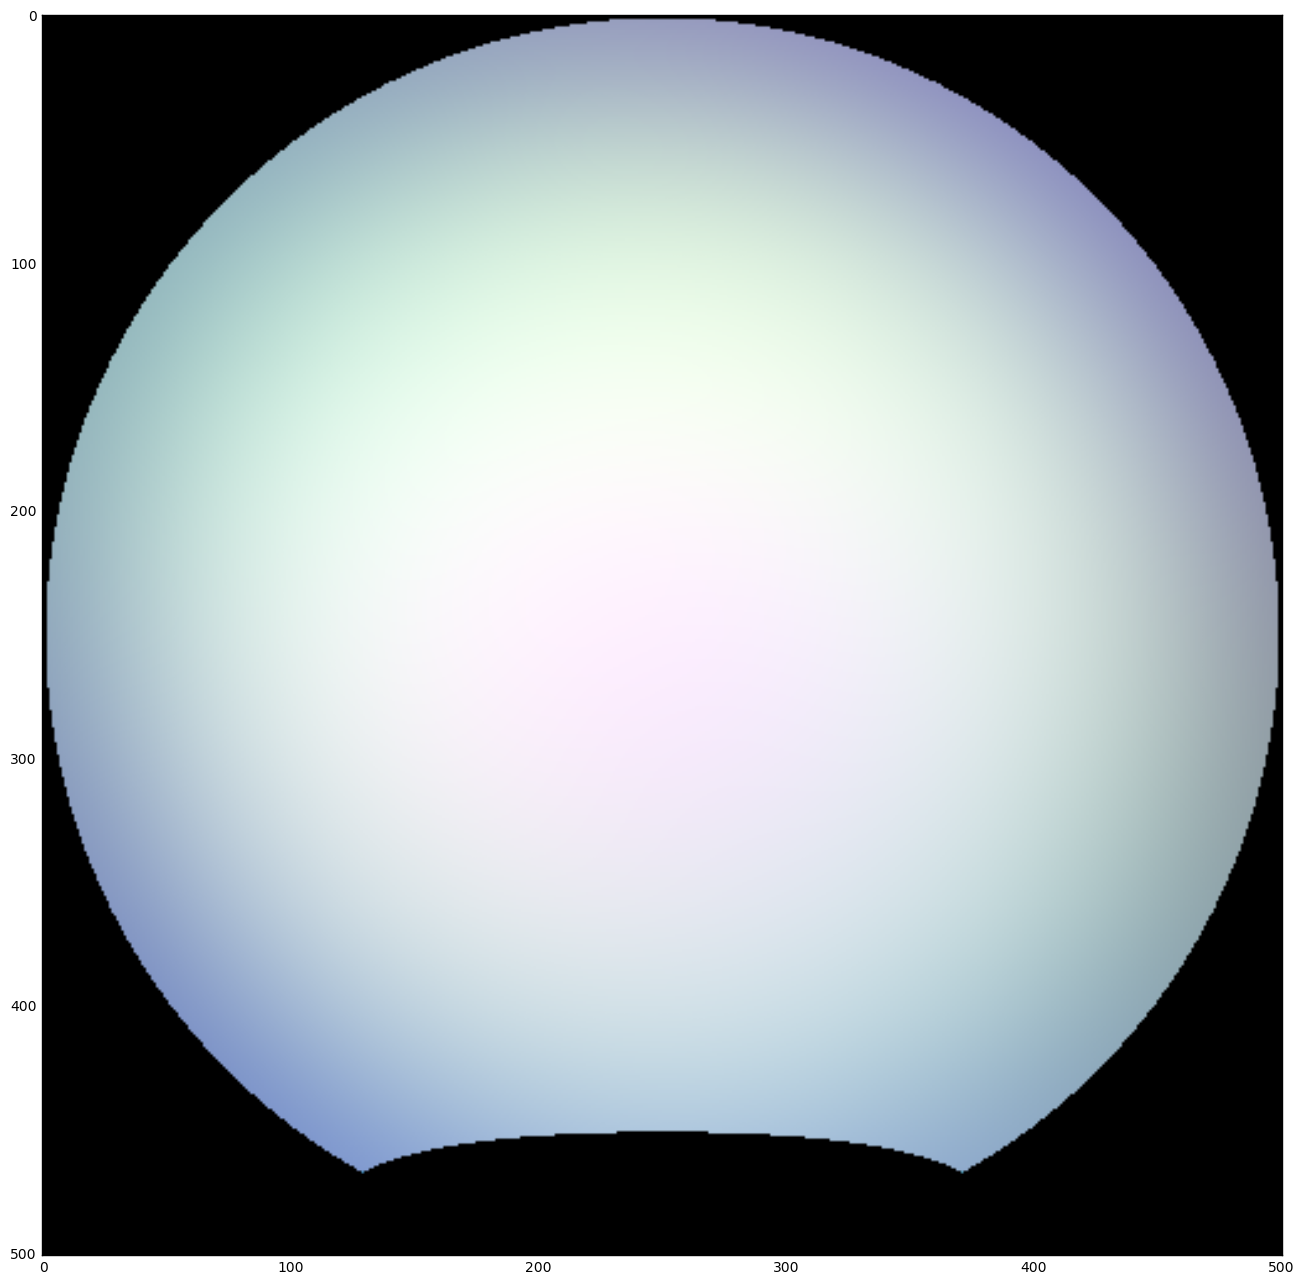

In [8]:
d = normalization.normalize(np.dstack(ratios))
plt.imshow(d)

In [7]:
vc.save('radiometric.pkl')

In [8]:
vc = VignettingCalibration.load('radiometric.pkl')
ratios = raw2RGB(vc.ratio)

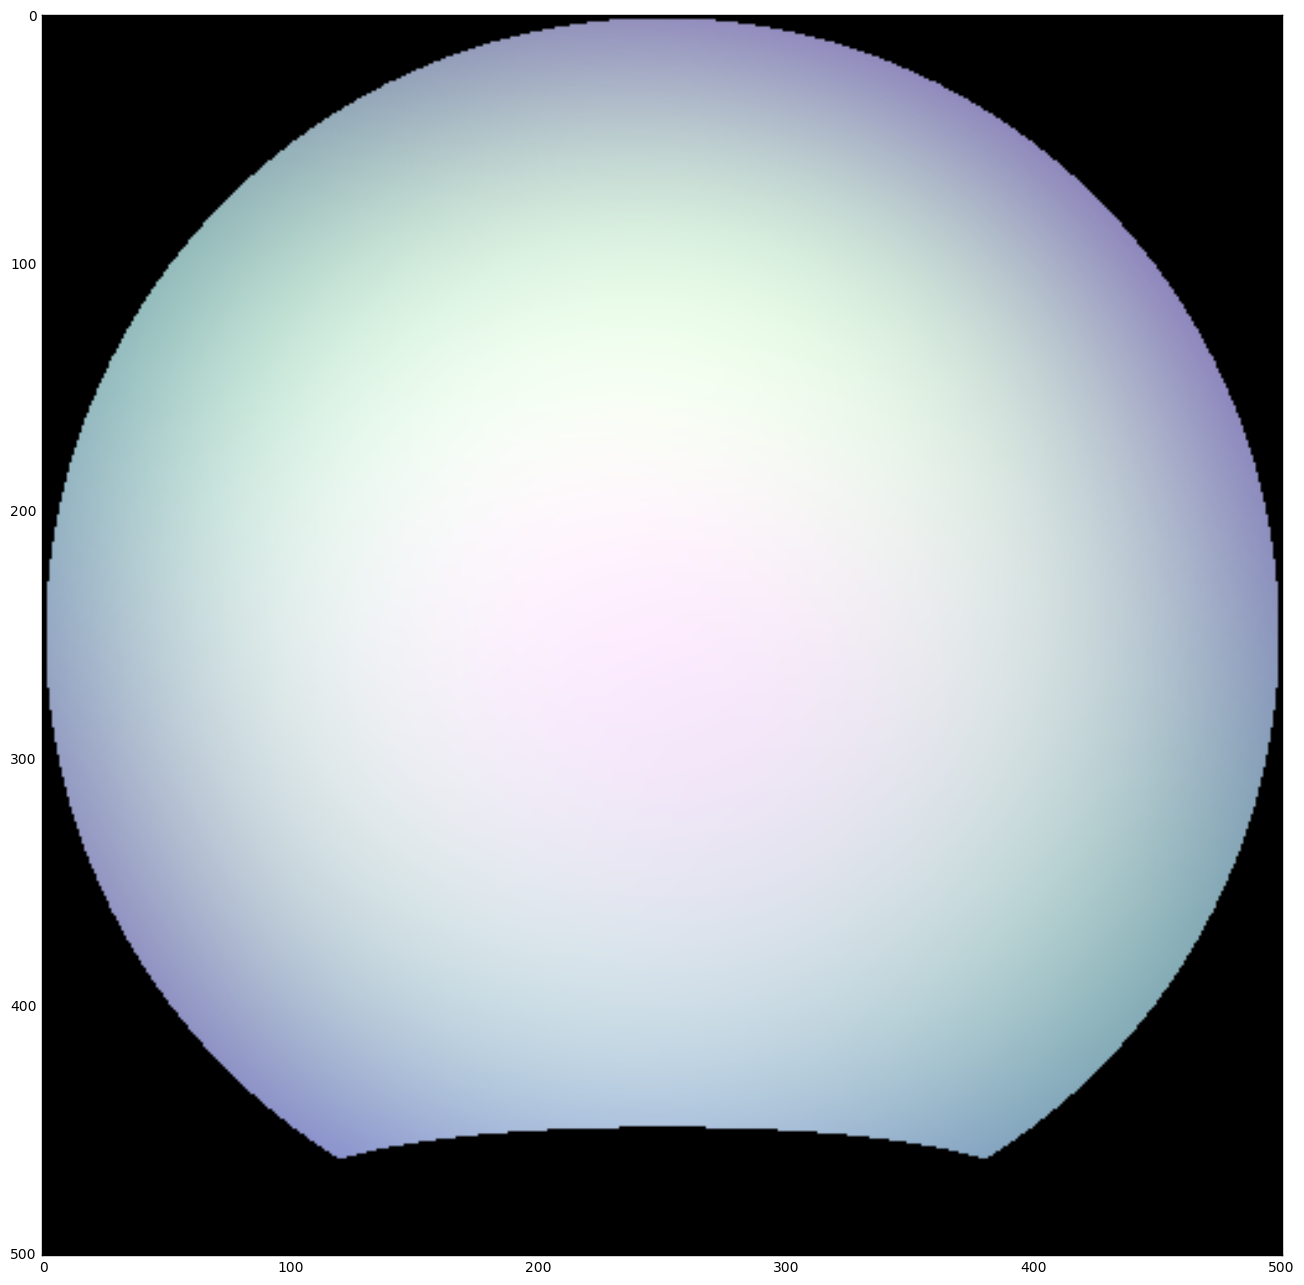

In [9]:
d = normalization.normalize(np.dstack(ratios))
plt.imshow(d)

## Comparing the effect of the vignetting.

In [16]:
#fe = fisheye.load_model(
#    r"D:/data/experiment_sukot_2016/cam_107/.calibration_data.dat", calib_img_shape=(600, 800))

#
# Creating the normalization object.
#
normalization = Normalization(
    gs.DEFAULT_NORMALIZATION_SIZE, FisheyeProxy(fe)
)

d = normalization.normalize(np.dstack(ratios))

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [18]:
def applyGamma(img):
    img = img.astype(np.float)**0.6
    
    return (255*img/img.max()).astype(np.uint8)

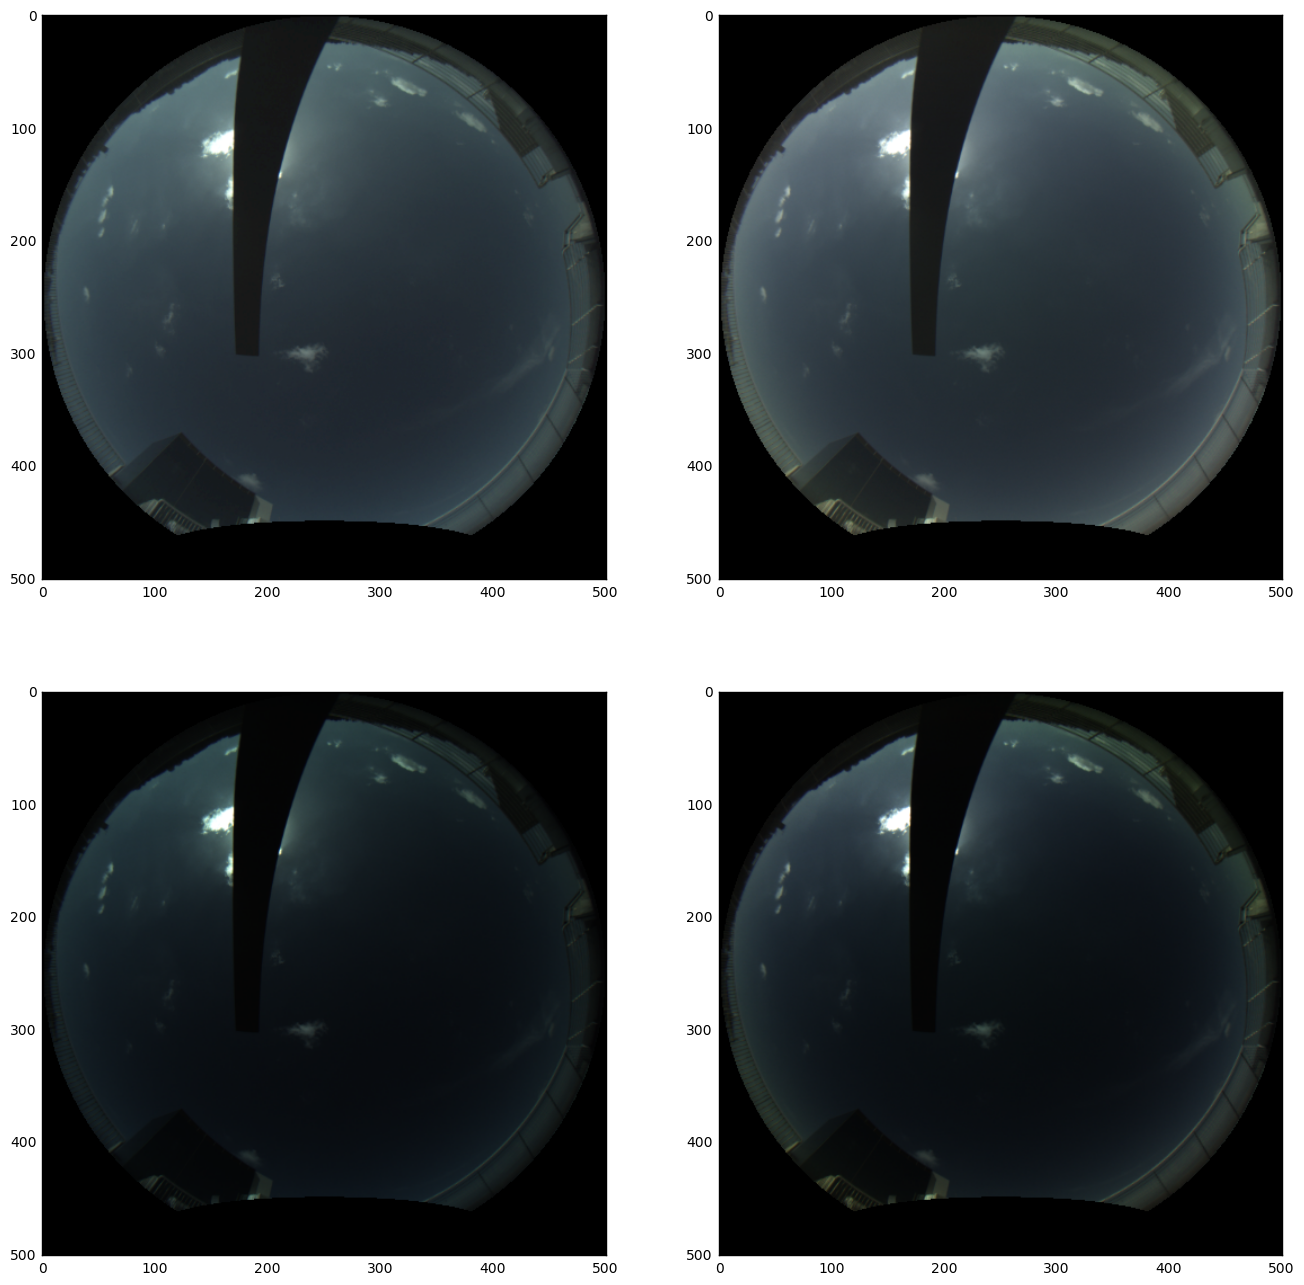

In [19]:
img = sio.loadmat(r'D:\data\experiment_sukot_2016\cam_107\captured_images\2016_10_19\1476875160.0_2016_10_19_11_06_00_2.mat')['img_array']
img_vign = vc.applyVignetting(img.astype(np.float))
img = normalization.normalize(img)
img_vign = normalization.normalize(img_vign)

max_val = 255
img_vign[img_vign>max_val] = max_val
plt.subplot(221)
plt.imshow(applyGamma(img))
plt.subplot(222)
plt.imshow(applyGamma(img_vign))
plt.subplot(223)
plt.imshow(img)
plt.subplot(224)
plt.imshow((255*img_vign/img_vign.max()).astype(np.uint8))

In [19]:
((255*img_vign/img_vign.max()).astype(np.uint8)>50).sum()

2

In [11]:
(img_vign>255).sum()

768

In [7]:
vc.ratio.min()

0.10000000000000001

In [23]:
vc.ratio.max()

1.0

In [13]:
img.keys()

['__version__', '__header__', 'img_array', '__globals__']

import mayavi.mlab as mlab
ygrid, xgrid = np.mgrid[0:600, 0:800]
mlab.points3d(xgrid, ygrid, ratios[0]*400, mode='point', color=(1, 0, 0))
mlab.points3d(xgrid, ygrid, ratios[1]*400, mode='point', color=(0, 1, 0))
mlab.points3d(xgrid, ygrid, ratios[2]*400, mode='point', color=(0, 0, 1))
mlab.show()